In [2]:
%pip install scikit-learn
%pip install numpy
%pip install matplotlib
%pip install scikit-image
%pip install imageio

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/4a/ed/7faf9f7a55d5b3095d33990a85603b66866cce2a608b27f0

In [27]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from skimage import io
import imageio
from PIL import Image

In [33]:
# Carica un'immagine
image = io.imread('img_test_4.jpg')

# Converti l'immagine in un array di pixel
original_shape = image.shape
array_image = np.array(image, dtype=np.float64) / 255.0  # Normalizza i valori dei pixel

# Reshape l'array dei pixel in un array 2D
pixels = array_image.reshape((-1, 3))

In [42]:
# Riduci il numero di colori utilizzando K-Means clustering
n_colors = 128  # Puoi personalizzare il numero di colori
pixels_sampled = shuffle(pixels, random_state=0)[:1000]  # Scegli un campione casuale di pixel per velocizzare il clustering
kmeans = KMeans(n_clusters=n_colors, random_state=1).fit(pixels_sampled)
labels = kmeans.predict(pixels)

# Sostituisci ogni pixel con il colore medio del cluster
new_pixels = kmeans.cluster_centers_[labels].reshape(original_shape)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


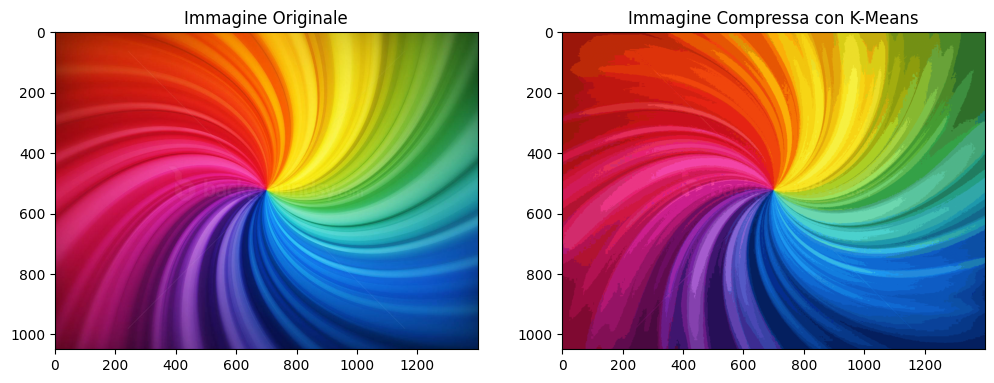

In [41]:

# Visualizza l'immagine originale e quella compressa
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Immagine Originale")

plt.subplot(1, 2, 2)
plt.imshow(new_pixels)
plt.title("Immagine Compressa con K-Means")

plt.show()


In [26]:
# resized_originale = (array_image * 255).astype(np.uint8)
resized_array = (new_pixels * 255).astype(np.uint8)
# imageio.imwrite('originale.bmp', resized_originale)
# imageio.imwrite('nuova.bmp', resized_nuova)
# Crea un oggetto immagine utilizzando Pillow
# image = Image.fromarray(resized_nuova)

img = Image.fromarray(resized_array)
img.save('test.gif')

ori=Image.fromarray((array_image * 255).astype(np.uint8))
ori.save('ori.bmp')